## Pre-processing

In [39]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import numpy as np
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
from datetime import datetime


df1 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [41]:
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


SOS: i dont understand to do sum / value_counts / mean or what to count here??
SOS: this is not a great way to reformat

In [101]:
df_new = df.copy()
df_new.head()
list_sum = df_new.sum().reset_index(name='steps')
list_sum = list_sum[1:328] #drop first row with totals
print(list_sum)

         index        steps
1    20-6-2013        87418
2    21-6-2013  2.19544e+06
3    22-6-2013  3.02732e+06
4    23-6-2013  2.19124e+06
5    24-6-2013  2.87107e+06
..         ...          ...
323   8-5-2014       353275
324   9-5-2014       679519
325  10-5-2014       654877
326  11-5-2014       551280
327  12-5-2014       495365

[327 rows x 2 columns]


In [102]:
df_plot = pd.DataFrame(list_sum)
df_plot['steps'] = df_plot['steps'].astype(int)
df_plot['index'] = df_plot['index'].apply(pd.to_datetime, errors='coerce')
df_plot.head()

,index,steps
1,2013-06-20,87418
2,2013-06-21,2195438
3,2013-06-22,3027319
4,2013-06-23,2191243
5,2013-06-24,2871071


## Plotting distributions

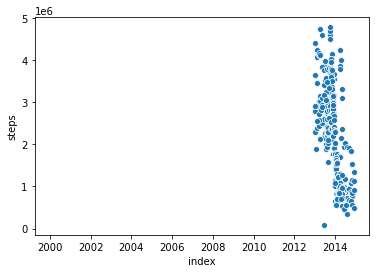

In [103]:
sns.scatterplot(data=df_plot, x="index", y="steps")

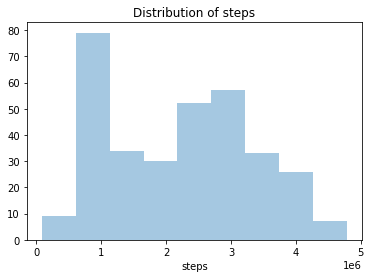

In [104]:
step_size = df_plot['steps'].dropna()
sns.distplot(step_size, kde=False) 
plt.title('Distribution of steps')
plt.show()

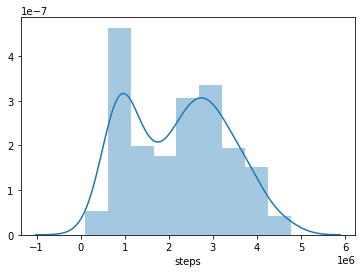

In [105]:
sns.distplot(df_plot['steps'])         
plt.show()

This is a dist plot.

Some things to note about this distribution:
* It has 2 peaks / bimodal
* It has a 'tail' on the right

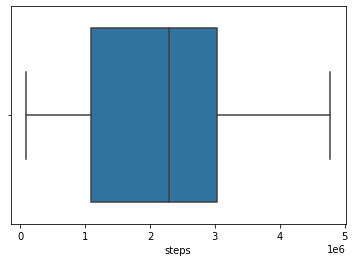

In [106]:
sns.boxplot(x=df_plot["steps"])

The median amount of steps is: 2300702.0 steps
The mean amount of steps is: 2202487.0 steps


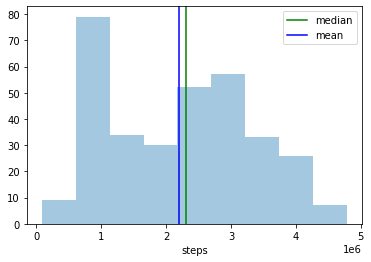

In [107]:
mean_size = df_plot['steps'].mean()
median_size = df_plot['steps'].median()

print(f'The median amount of steps is: {median_size} steps')
print(f'The mean amount of steps is: {mean_size} steps')

sns.distplot(step_size, kde=False)
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

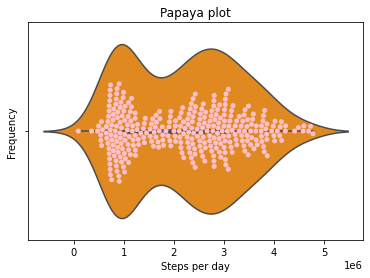

In [122]:
sns.violinplot(df_plot['steps'], color='darkorange')
sns.swarmplot(df_plot['steps'], color='pink') #default color doesn't stand out
plt.title('Papaya plot')
plt.ylabel('Frequency')
plt.xlabel('Steps per day')
plt.show()